# Determine the sampling of SIF data we get from BAM and SM1/2

In [1]:
import numpy as np
# Set up matplotlib and use a nicer set of plot parameters
%config InlineBackend.rc = {}
import matplotlib
matplotlib.rc_file("../templates/matplotlibrc")
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from astropy.io import fits

In [3]:
dataroot = "../datasets/sif_fits/"  # all the SIF files are here (simlink)

First, let's try the following: Scan all the files for their filenames to see if the contain SM1/2 or BAM*CLOCKING

If they do, record their OBMT into an array

In [4]:
import glob
import re as regex

In [5]:
# grab the paths
sm1path = glob.glob(dataroot+"*/*SM1*")
sm2path = glob.glob(dataroot+"*/*SM2*")
bampath = glob.glob(dataroot+"*/*BAM*CLOCKING*")

This is actually more efficient than picking OBMT_BEG out of the headers...

In [6]:
t_sm1 = []
t_sm2 = []
t_bam = []

for path in sm1path:
    t_sm1.append(int(regex.search("(?<=OBMT_START_)[0-9]+",path).group(0)))
for path in sm2path:
    t_sm2.append(int(regex.search("(?<=OBMT_START_)[0-9]+",path).group(0)))
for path in bampath:
    t_bam.append(int(regex.search("(?<=OBMT_START_)[0-9]+",path).group(0)))

Now let's histogram it. We'll try to go for a daily binning.

In [7]:
# find a common binning
t0 = min(t_sm1+t_sm2+t_bam)
t1 = max(t_sm1+t_sm2+t_bam)

# OBMT is in ns and I want approx. daily binning
NBINS=int((t1-t0)/1e9/3600/24)+1
bins = np.linspace(t0,t1,NBINS,endpoint=True)

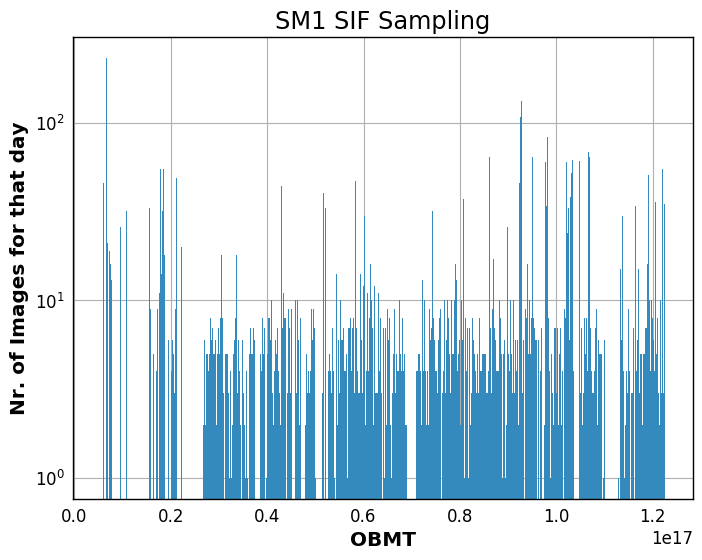

In [8]:
plt.title("SM1 SIF Sampling")
plt.xlabel("OBMT")
plt.ylabel("Nr. of Images for that day")
histsm1 = plt.hist(t_sm1, bins=bins,log=True)

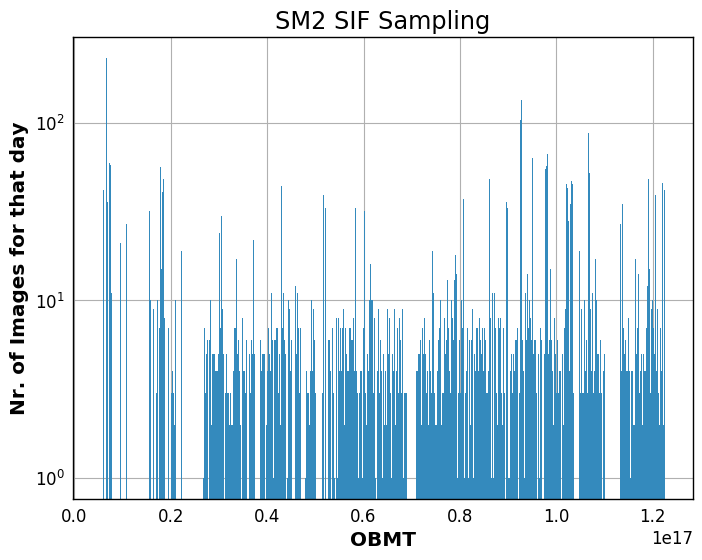

In [9]:
plt.title("SM2 SIF Sampling")
plt.xlabel("OBMT")
plt.ylabel("Nr. of Images for that day")
histsm2 = plt.hist(t_sm2, bins=bins,log=True)

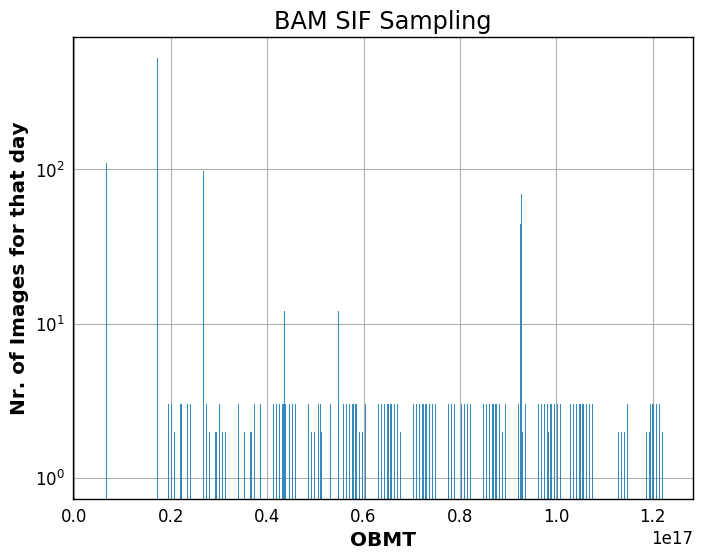

In [10]:
plt.title("BAM SIF Sampling")
plt.xlabel("OBMT")
plt.ylabel("Nr. of Images for that day")
histbam = plt.hist(t_bam, bins=bins,log=True)

So, it seems that the sampling for the SM's are
- similar
- fairly regular - especially towards the later end, it's pretty much daily

**However**, the BAM data seems very irregular - this is a logarithmic plot, so there are ~500 samplings in one day towards that beginning - perhaps a special calibration effort?

Let's make a histogram of the number of samplings per day.

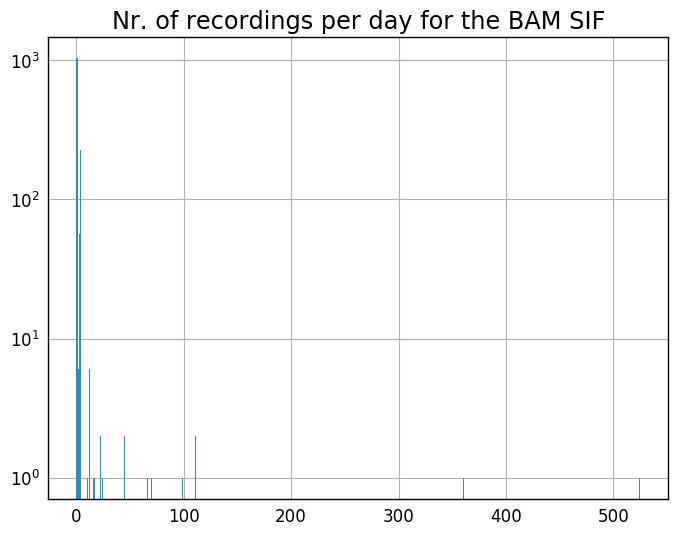

In [11]:
freqbins = int(max(histbam[0]))
plt.title("Nr. of recordings per day for the BAM SIF")
freqbam = plt.hist(histbam[0],bins=np.linspace(0,freqbins,freqbins+1,endpoint=True),log=True)

This is heavily concentrated towards low numbers, so take a look at the first few bins (0-9)

In [12]:
print((freqbam[0][0:10]))

[ 1044.     6.    56.   226.     0.     0.     0.     0.     0.     0.]


So we have many unsampled days as well as a peak of days with 3 records - and a few outliers (at about 540, for instance)